# Predicting Customer Churn Using Decision Trees

## 1. Business Understanding

*   Defining Churn & Its Effects
      *   Customer Churn refers to the act of when a customer ceases to use the product or services of a company over a period of time. It essentially refers to the loss of a customer within a range of time.
      *   In the context of the telecommunications industry, customer churn refers to customers who cancel their subsription and use of a telecomunication companies' services such as internet, cable and satellite tv, phone data, WiFi, etc.
      *   Customer Churn in this scenario can be a massive problem for companies due to the obvious fact that with decreasing customer there will be corresponding decreasing profits. This may be especial;ly true for a telecomunications company where there are various big name competitors looking to take as many customers from each other as possible through cosntant deals and offers, making it easier for customers to be a bit more dynamic in their choice of telecommunications provider.


## 2. Data Understanding

Customer Information
*   cust_id – Unique identifier for each customer
*   region – Geographic region code where the customer resides
*   tenure – Number of months the customer has been with the company
*   age – Customer’s age in years
*   marital – Whether the customer is married (Y/N)
*   address – Number of years the customer has lived at their current address
*   income – Estimated household income (in $1,000s)
*   ed – Education level (coded categories)
*   employ – Number of years the customer has been employed
*   retire – Whether the customer is retired (Y/N)
*   gender – Customer’s gender (Y/N)
*   reside – Number of people living in the household

Service Subscriptions
*   tollfree – Whether the customer has a toll-free service (Y/N)
*   equip – Whether the customer leases telecom equipment (Y/N)
*   callcard – Whether the customer has a calling card service (Y/N)
*   wireless – Whether the customer subscribes to wireless services (Y/N)
*   multline – Whether the customer has multiple lines (Y/N)
*   voice – Whether the customer has a voicemail service (Y/N)
*   pager – Whether the customer uses a pager service (Y/N)
*   internet – Whether the customer subscribes to internet service (Y/N)
*   callid – Whether the customer has caller ID service (Y/N)
*   callwait – Whether the customer has call waiting service (Y/N)
*   forward – Whether the customer has call forwarding service (Y/N)
*   confer – Whether the customer has three-way calling (conference) service (Y/N)
*   ebill – Whether the customer uses electronic billing (Y/N)

Usage Measures
*   longmon – Average monthly charge for long-distance calls
*   tollmon – Average monthly charge for toll-free calls
*   equipmon – Average monthly equipment charge
*   cardmon – Average monthly calling card charge
*   wiremon – Average monthly wireless service charge
*   longten – Total long-distance charges over the past 10 months
*   tollten – Total toll-free charges over the past 10 months
*   equipten – Total equipment charges over the past 10 months
*   cardten – Total calling card charges over the past 10 months
*   wireten – Total wireless charges over the past 10 months

Derived / Other
*   loglong – Log-transformed long-distance charges (used for modeling)
*   lninc – Log-transformed household income
*   custcat – Customer category/class label (C1, C2, etc.)
*   churn – Target variable: whether the customer left (Y) or stayed (N)

<br>

Target variable: **churn** with a data type = object

<br>

These variables refer to the demographic information of a comany's customers, what services they had/have,and time related information of customers using company services.

Many of the non-target variables can assist in building a predicitive classification model thanks to ther being demographic, time, and usage data, helping significantly with data classification.

### 2.5 Data Understanding - Expolratory Data Analysis

In [101]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [103]:
# Read data
CustomerChurnData = pd.read_csv("/content/drive/MyDrive/IS470 Colab Datasets/CutomerChurnData.csv")
CustomerChurnData

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N


In [104]:
CustomerChurnData.shape

(1000, 39)

In [105]:
CustomerChurnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cust_id   1000 non-null   object 
 1   region    1000 non-null   object 
 2   tenure    1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   marital   1000 non-null   object 
 5   address   1000 non-null   int64  
 6   income    1000 non-null   int64  
 7   ed        1000 non-null   object 
 8   employ    1000 non-null   int64  
 9   retire    1000 non-null   object 
 10  gender    1000 non-null   object 
 11  reside    1000 non-null   int64  
 12  tollfree  1000 non-null   object 
 13  equip     1000 non-null   object 
 14  callcard  1000 non-null   object 
 15  wireless  1000 non-null   object 
 16  longmon   1000 non-null   float64
 17  tollmon   1000 non-null   float64
 18  equipmon  1000 non-null   float64
 19  cardmon   1000 non-null   float64
 20  wiremon   1000 non-null   float

In [106]:
CustomerChurnData.describe()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.242000,41.552000,11.576000,71.906000,10.79000,2.316000,11.163600,13.34350,13.572200,13.911500,10.88070,536.994100,535.407900,440.293200,616.090000,423.188500,2.149468,3.926546
std,21.295937,12.679435,10.132467,80.297826,10.14499,1.434644,9.540451,17.41479,18.850834,14.404653,19.24529,729.764065,867.466796,848.250381,874.929462,961.485455,0.716255,0.778627
min,1.000000,18.000000,0.000000,9.000000,0.00000,1.000000,1.050000,0.00000,0.000000,0.000000,0.00000,1.050000,0.000000,0.000000,0.000000,0.000000,0.049000,2.197000
25%,16.000000,32.000000,3.750000,28.000000,3.00000,1.000000,5.150000,0.00000,0.000000,0.000000,0.00000,86.037500,0.000000,0.000000,0.000000,0.000000,1.639000,3.332000
50%,34.500000,40.000000,9.000000,46.000000,8.00000,2.000000,8.500000,0.00000,0.000000,12.125000,0.00000,288.225000,0.000000,0.000000,362.500000,0.000000,2.140000,3.829000
75%,53.000000,51.000000,18.000000,83.250000,17.25000,3.000000,13.862500,24.25000,30.787500,19.562500,23.58750,700.387500,836.912500,466.512500,871.250000,140.075000,2.629000,4.422000
max,72.000000,77.000000,55.000000,732.000000,47.00000,7.000000,99.950000,173.00000,77.700000,109.250000,109.70000,7257.600000,4905.850000,4758.050000,7515.000000,6444.950000,4.605000,6.596000


In [107]:
CustomerChurnData.head(10)

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
5,C00129,R2,5,33,N,10,125,E4,5,N,...,Y,N,N,N,N,Y,1.579,4.828,C1,Y
6,C00130,R1,41,38,Y,8,37,E2,9,N,...,N,N,N,N,N,N,2.146,3.611,C1,N
7,C00131,R2,9,46,N,3,25,E1,8,N,...,N,N,N,N,N,N,1.482,3.219,C1,N
8,C00132,R3,60,57,N,38,162,E2,30,N,...,N,Y,Y,Y,Y,N,2.782,5.088,C3,N
9,C00133,R2,1,24,N,3,20,E1,3,N,...,N,N,N,N,N,N,0.049,2.996,C1,N


In [108]:
CustomerChurnData.tail(10)

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
990,C01114,R2,24,27,N,2,17,E3,3,N,...,N,N,Y,N,N,N,1.649,2.833,C2,Y
991,C01115,R2,34,23,Y,3,24,E1,7,N,...,N,N,Y,Y,Y,N,1.792,3.178,C3,N
992,C01116,R3,6,32,N,10,47,E1,10,N,...,N,Y,Y,Y,Y,N,1.348,3.850,C3,N
993,C01117,R2,3,26,Y,6,59,E4,0,N,...,N,Y,N,Y,Y,N,0.936,4.078,C4,Y
994,C01118,R1,72,40,Y,19,163,E4,15,N,...,N,N,N,N,Y,Y,3.664,5.094,C2,N
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N
999,C01123,R3,70,49,N,18,87,E2,22,N,...,N,Y,Y,Y,Y,N,3.243,4.466,C3,N


In [109]:
CustomerChurnData.isnull().sum()

,0
cust_id,0
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0


In [110]:
CustomerChurnData['churn'].value_counts()

,count
churn,
N,742
Y,258


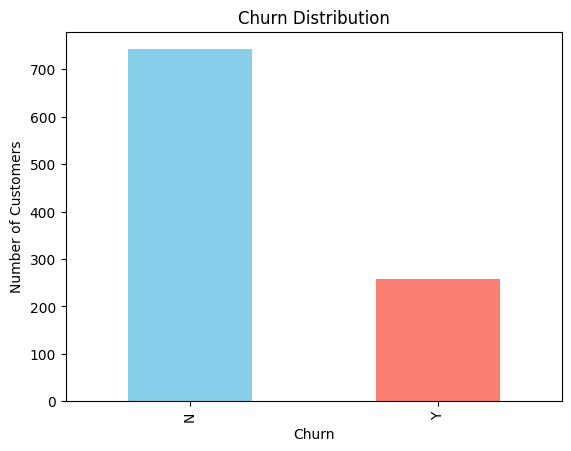

In [111]:
# Churn distribution
CustomerChurnData['churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


Chart 1
*   There are substantially more customers who did not churn as opposed to those who did with customers being 742 while churned customers were 258.



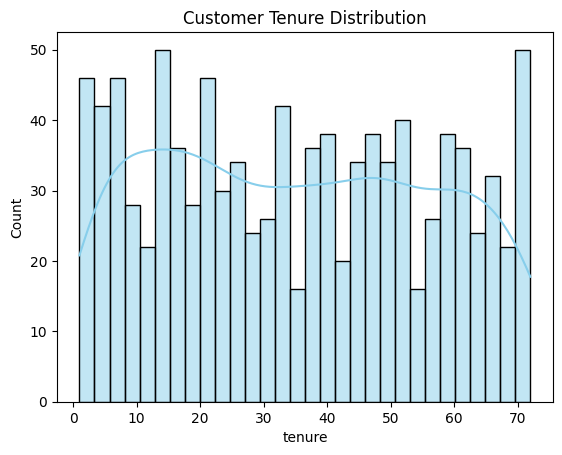

In [112]:
sns.histplot(CustomerChurnData['tenure'], bins=30, kde=True, color='skyblue')
plt.title("Customer Tenure Distribution")
plt.show()


Chart 2
*   Custoemr Tenure (in months) is pretty distributed with no particular high spikes. The histogram shows that customers within the datset churn earlier between 1-21 months.



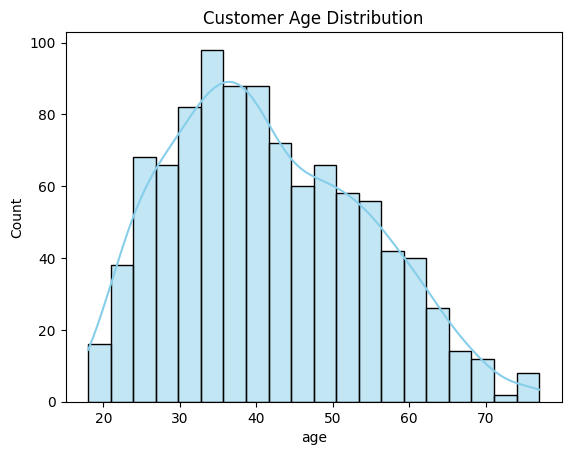

In [113]:
sns.histplot(CustomerChurnData['age'], bins=20, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.show()


Chart 3
*   Customers range from around 19-77, with the vast majority of customers being in the 30-45 range.
*   As age increases, customers at that age gradually decreases.



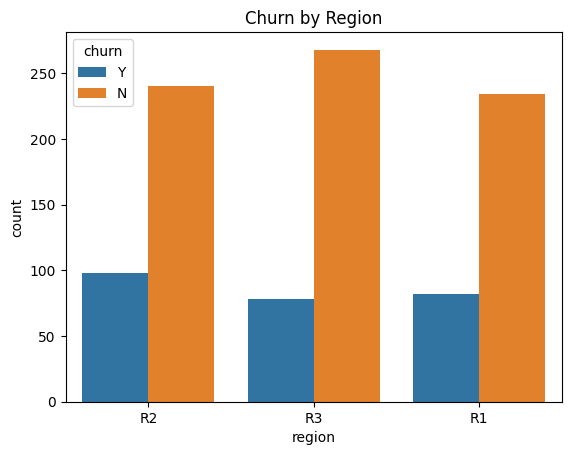

In [114]:
sns.countplot(x='region', hue='churn', data=CustomerChurnData)
plt.title("Churn by Region")
plt.show()

Chart 4
*   This chart measures the Churn ratio by region, with all3 regions being relatively similar and not possessing any massive outliers.



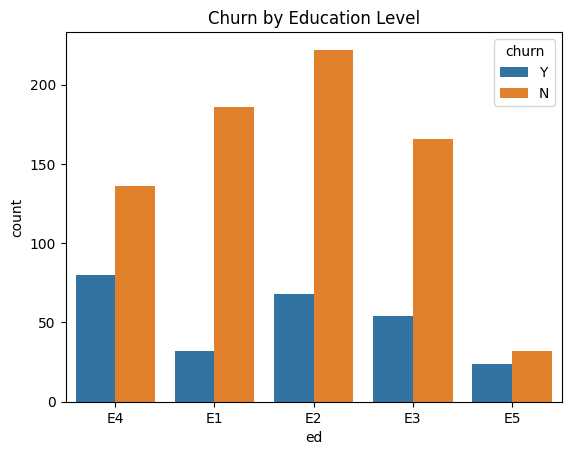

In [115]:
sns.countplot(x='ed', hue='churn', data=CustomerChurnData)
plt.title("Churn by Education Level")
plt.show()


Chart 5
*   E5 level customers tend to havve substantially lower counts of active customers with ratio between churn and active custoemrs being much closer than any of the other education levels from 1 through 4.



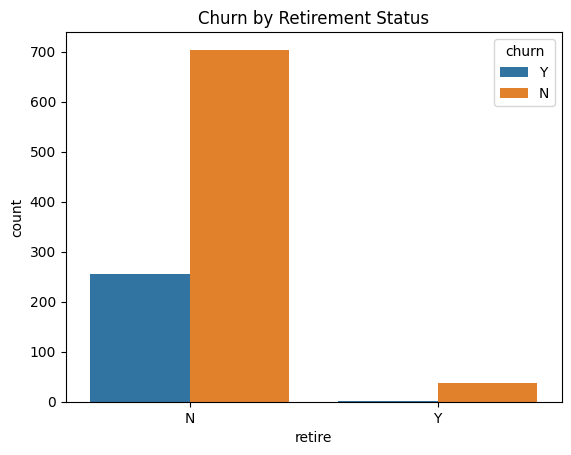

In [116]:
sns.countplot(x='retire', hue='churn', data=CustomerChurnData)
plt.title("Churn by Retirement Status")
plt.show()


Chart 6
*   Customers who are retired have substantially been active and churned customers.
*   Retired customers make up a tiny number of the churned customers,



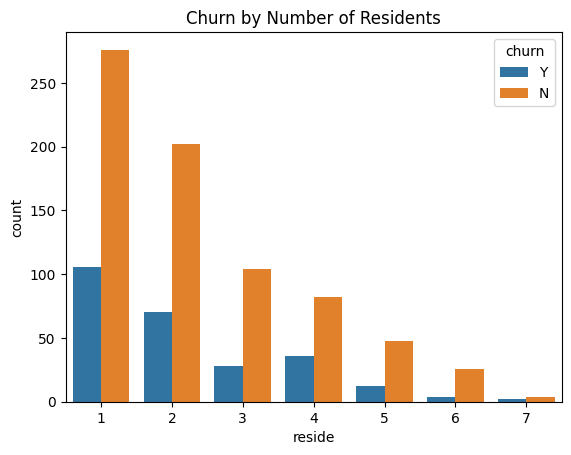

In [117]:
sns.countplot(x='reside', hue='churn', data=CustomerChurnData)
plt.title("Churn by Number of Residents")
plt.show()

Chart 7
*   The more residents in a household, the smaller the number of active and churned customers.



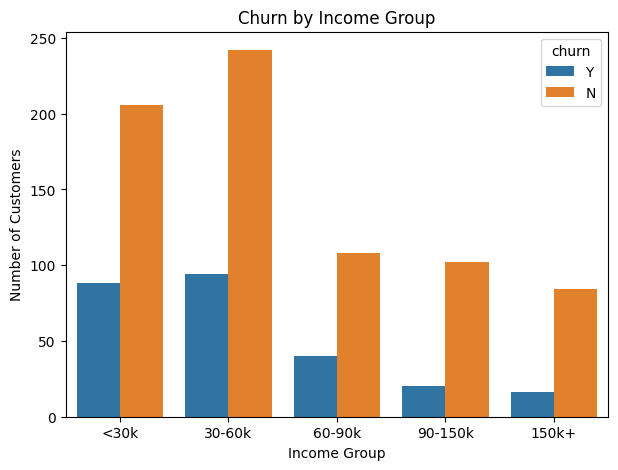

In [118]:
CustomerChurnData['income_group'] = pd.cut(CustomerChurnData['income'],
                                           bins=[0, 30, 60, 90, 150, 750],
                                           labels=['<30k','30-60k','60-90k','90-150k','150k+'])
plt.figure(figsize=(7,5))
sns.countplot(x='income_group', hue='churn', data=CustomerChurnData)
plt.title("Churn by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Customers")
plt.show()


Chart 8
*   The higher the income group, there are less all time customers and less churned customers.

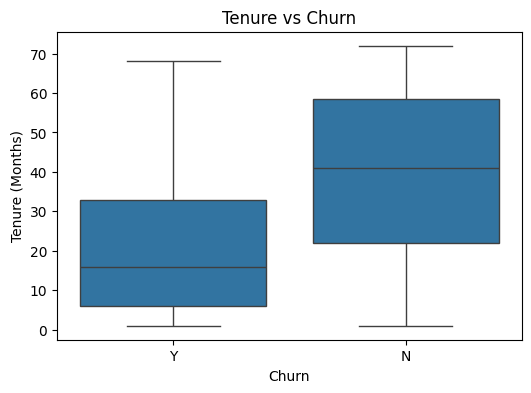

In [119]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='tenure', data=CustomerChurnData)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


Chart 9
*   Customers of higher tenure seem to churn significantly less than younger individuals.



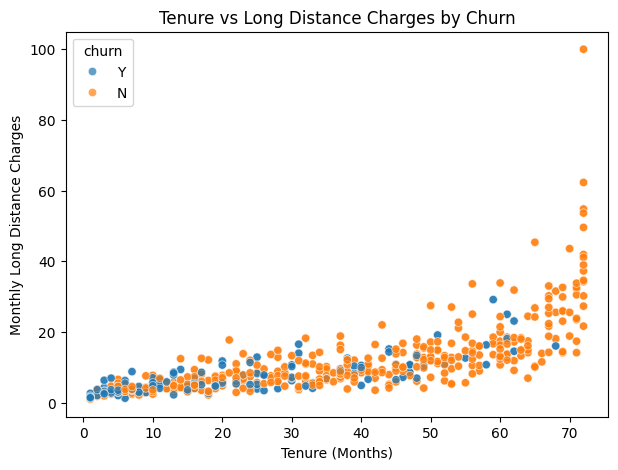

In [120]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='tenure', y='longmon', hue='churn', data=CustomerChurnData, alpha=0.7)
plt.title("Tenure vs Long Distance Charges by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Long Distance Charges")
plt.show()


Chart 10
*   Higher churn occurs for customers at lower tenures

## 3. Data Preperation

In [121]:
CustomerChurnData.dtypes

,0
cust_id,object
region,object
tenure,int64
age,int64
marital,object
address,int64
income,int64
ed,object
employ,int64
retire,object


In [122]:
CustomerChurnData['region'] = CustomerChurnData['region'].astype('category')
CustomerChurnData['marital'] = CustomerChurnData['marital'].astype('category')
CustomerChurnData['ed'] = CustomerChurnData['ed'].astype('category')
CustomerChurnData['retire'] = CustomerChurnData['retire'].astype('category')
CustomerChurnData['gender'] = CustomerChurnData['gender'].astype('category')
CustomerChurnData['tollfree'] = CustomerChurnData['tollfree'].astype('category')
CustomerChurnData['equip'] = CustomerChurnData['equip'].astype('category')
CustomerChurnData['callcard'] = CustomerChurnData['callcard'].astype('category')
CustomerChurnData['wireless'] = CustomerChurnData['wireless'].astype('category')
CustomerChurnData['multline'] = CustomerChurnData['multline'].astype('category')
CustomerChurnData['voice'] = CustomerChurnData['voice'].astype('category')
CustomerChurnData['pager'] = CustomerChurnData['pager'].astype('category')
CustomerChurnData['internet'] = CustomerChurnData['internet'].astype('category')
CustomerChurnData['callid'] = CustomerChurnData['callid'].astype('category')
CustomerChurnData['callwait'] = CustomerChurnData['callwait'].astype('category')
CustomerChurnData['forward'] = CustomerChurnData['forward'].astype('category')
CustomerChurnData['confer'] = CustomerChurnData['confer'].astype('category')
CustomerChurnData['ebill'] = CustomerChurnData['ebill'].astype('category')
CustomerChurnData['custcat'] = CustomerChurnData['custcat'].astype('category')
CustomerChurnData['churn'] = CustomerChurnData['churn'].astype('category')

In [123]:
CustomerChurnData.dtypes

,0
cust_id,object
region,category
tenure,int64
age,int64
marital,category
address,int64
income,int64
ed,category
employ,int64
retire,category


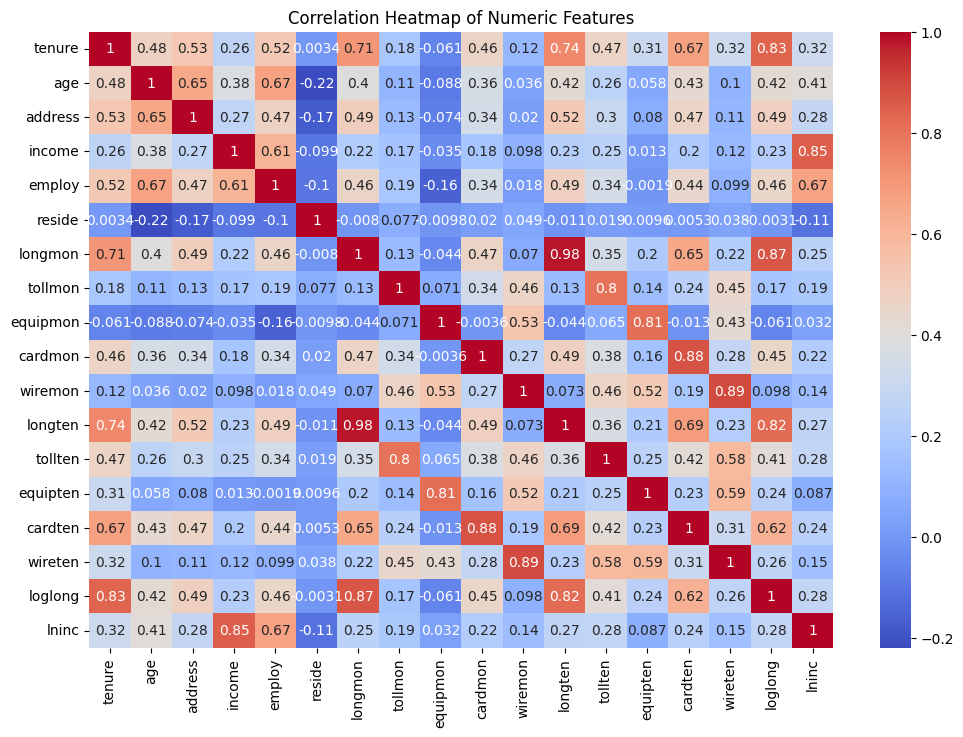

In [124]:
# Correlation matrix
corr_matrix = CustomerChurnData.corr(numeric_only=True)

# Display heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Correlation matrix does not show any highly correlated variables (aside from a few bvariables taht are almost the same but just measuered by month instead of year)

Data Balance
*   As the analysis dispalys above, the data is not balanced, with most of customeres remaining active customers (742) and 258 customers becoming churned customers.



In [125]:
CustomerChurnData.select_dtypes(['category']).columns

Index(['region', 'marital', 'ed', 'retire', 'gender', 'tollfree', 'equip',
       'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet',
       'callid', 'callwait', 'forward', 'confer', 'ebill', 'custcat', 'churn',
       'income_group'],
      dtype='object')

In [126]:
#Convert Categorical variables into numeric dummy collumns for modeling
CustomerChurnData_dummies = pd.get_dummies(CustomerChurnData, drop_first=True)
CustomerChurnData_dummies.head(10)

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,...,confer_Y,ebill_Y,custcat_C2,custcat_C3,custcat_C4,churn_Y,income_group_30-60k,income_group_60-90k,income_group_90-150k,income_group_150k+
0,13,44,9,64,5,2,3.70,0.00,0.00,7.50,...,False,False,False,False,False,True,False,True,False,False
1,68,52,24,116,29,2,18.15,18.00,0.00,30.25,...,True,False,False,True,False,False,False,False,True,False
2,23,30,9,30,2,4,6.30,0.00,0.00,0.00,...,True,False,False,True,False,False,False,False,False,False
3,45,22,2,19,4,5,10.90,0.00,0.00,8.75,...,False,True,True,False,False,True,False,False,False,False
4,45,59,7,166,31,5,9.75,28.50,0.00,12.00,...,True,False,False,True,False,False,False,False,False,True
5,5,33,10,125,5,1,4.85,0.00,26.15,0.00,...,False,True,False,False,False,True,False,False,True,False
6,41,38,8,37,9,3,8.55,0.00,0.00,41.75,...,False,False,False,False,False,False,True,False,False,False
7,9,46,3,25,8,2,4.40,0.00,0.00,0.00,...,False,False,False,False,False,False,False,False,False,False
8,60,57,38,162,30,1,16.15,29.75,31.30,30.00,...,True,False,False,True,False,False,False,False,False,True
9,1,24,3,20,3,1,1.05,0.00,0.00,0.00,...,False,False,False,False,False,False,False,False,False,False


drop_first=True avoids the dummy variable trap (perfect multicollinearity).

Summary

*   Changed various object & flaot variables to category.

*   Found no missing values or correlated variables.

*   Target variable = churn.

*   Dataset is imbalanced as vast majority of customers remained active while 25.8% being churned customers

*   Dummy coding applied to categorical features.

## 4. Modeling

### Model 1, Entropy = 3

In [127]:
# Split into predictors (X) and target (y)
predictors = CustomerChurnData.drop('churn', axis=1)
target = CustomerChurnData['churn']

# Train-test split (70% train, 30% test)
from sklearn.model_selection import train_test_split
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.3, random_state=1, stratify=target)

# Convert categorical variables to dummy variables
predictors_train = pd.get_dummies(predictors_train)
predictors_test = pd.get_dummies(predictors_test)

# Align columns so train and test match
predictors_train, predictors_test = predictors_train.align(predictors_test, join="left", axis=1, fill_value=0)

from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=3)
model_DT.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'longten <= 151.975\nentropy = 0.825\nsamples = 700\nvalue = [519, 181]\nclass = No'),
 Text(0.25, 0.625, 'internet_N <= 0.5\nentropy = 1.0\nsamples = 233\nvalue = [115, 118]\nclass = Yes'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'tenure <= 3.5\nentropy = 0.89\nsamples = 104\nvalue = [32, 72]\nclass = Yes'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Yes'),
 Text(0.1875, 0.125, 'entropy = 0.942\nsamples = 89\nvalue = [32, 57]\nclass = Yes'),
 Text(0.375, 0.375, 'longten <= 21.65\nentropy = 0.94\nsamples = 129\nvalue = [83, 46]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.907\nsamples = 31\nvalue = [10, 21]\nclass = Yes'),
 Text(0.4375, 0.125, 'entropy = 0.819\nsamples = 98\nvalue = [73, 25]\nclass = No'),
 Text(0.75, 0.625, 'tenure <= 62.5\nentropy = 0.571\nsamples = 467\nvalue = [404.0, 63.0]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'internet_Y <= 0.5\nentropy = 0.648\nsamples = 374\nvalue = [31

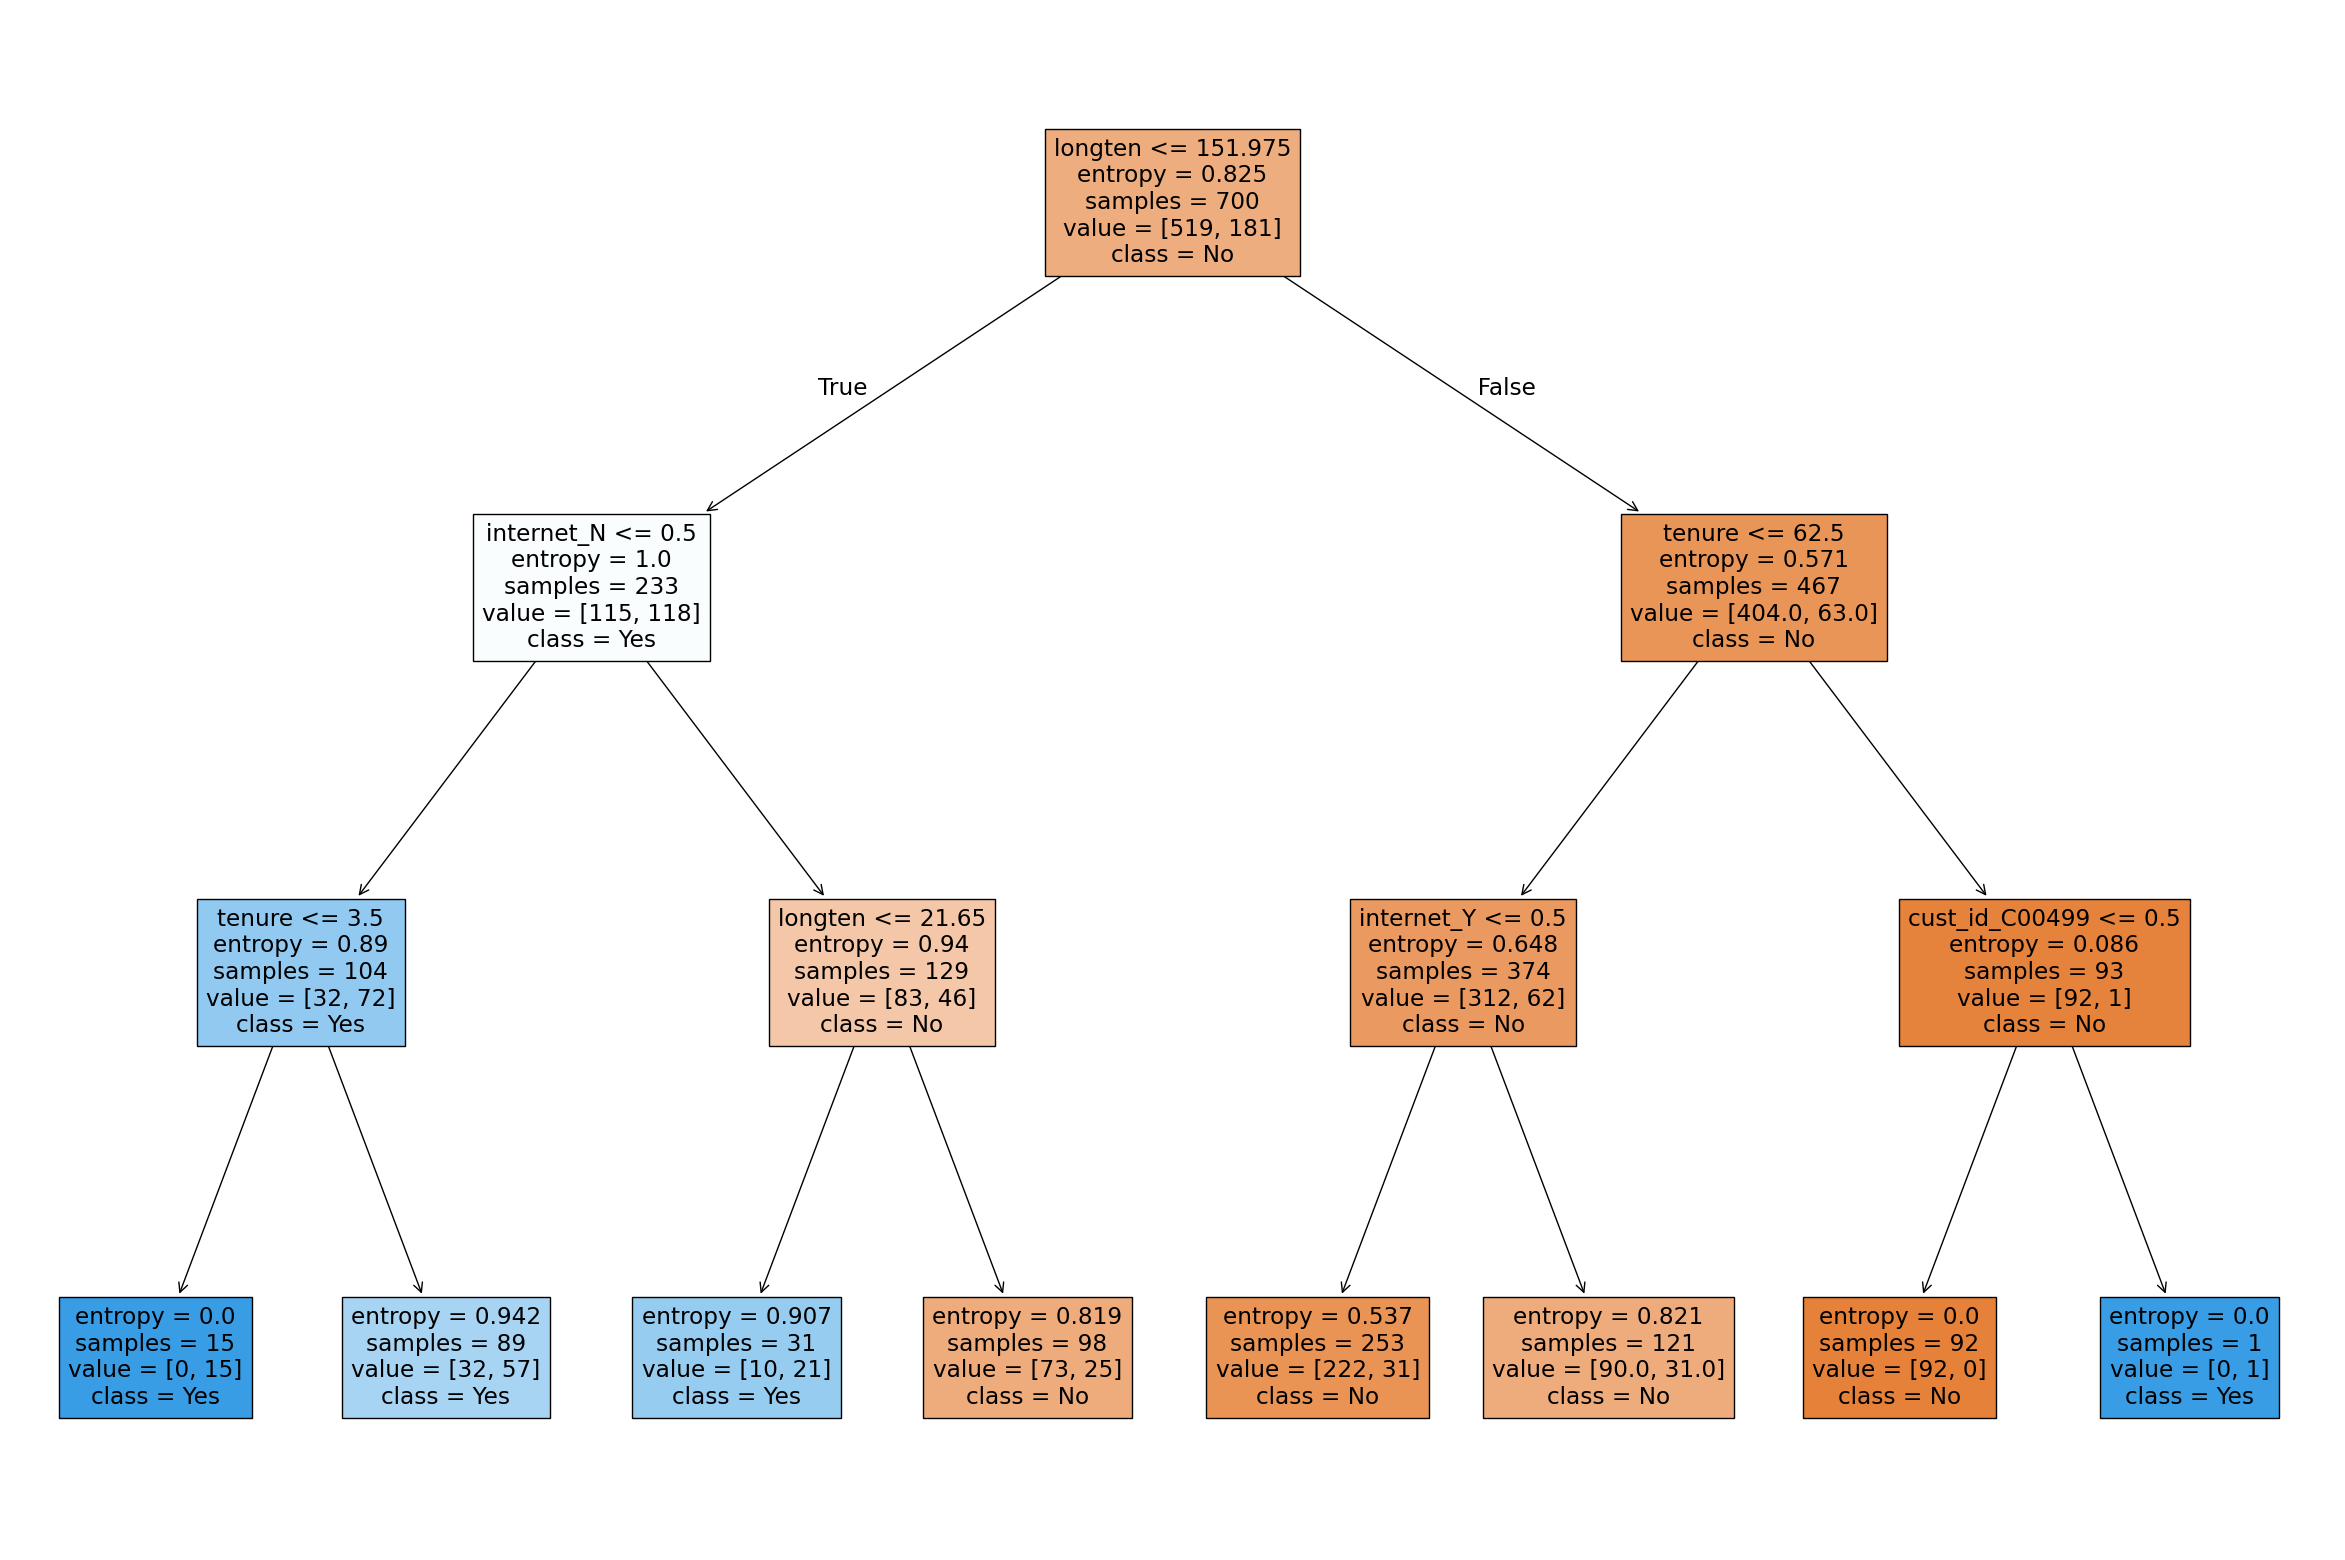

In [128]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_DT,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)


In [129]:
# Text version of decision tree
print(tree.export_text(model_DT, feature_names=list(predictors_train.columns)))


|--- longten <= 151.97
|   |--- internet_N <= 0.50
|   |   |--- tenure <= 3.50
|   |   |   |--- class: Y
|   |   |--- tenure >  3.50
|   |   |   |--- class: Y
|   |--- internet_N >  0.50
|   |   |--- longten <= 21.65
|   |   |   |--- class: Y
|   |   |--- longten >  21.65
|   |   |   |--- class: N
|--- longten >  151.97
|   |--- tenure <= 62.50
|   |   |--- internet_Y <= 0.50
|   |   |   |--- class: N
|   |   |--- internet_Y >  0.50
|   |   |   |--- class: N
|   |--- tenure >  62.50
|   |   |--- cust_id_C00499 <= 0.50
|   |   |   |--- class: N
|   |   |--- cust_id_C00499 >  0.50
|   |   |   |--- class: Y



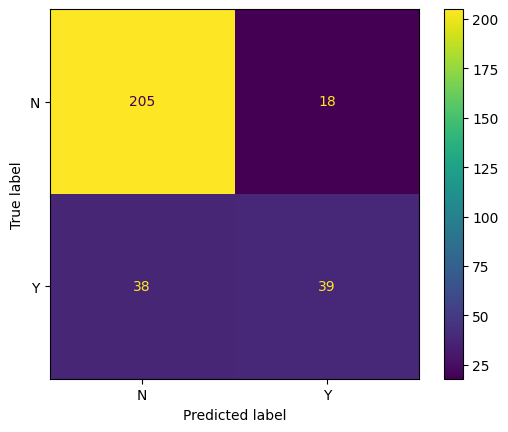

In [130]:
# Make predictions on testing data
prediction_on_test_DT = model_DT.predict(predictors_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_DT = confusion_matrix(target_test, prediction_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_DT.classes_).plot()

In [131]:
from sklearn.metrics import classification_report

# Evaluation
print("Classification Report (Entropy, max_depth=3):\n")
print(classification_report(target_test, prediction_on_test_DT))


Classification Report (Entropy, max_depth=3):

              precision    recall  f1-score   support

           N       0.84      0.92      0.88       223
           Y       0.68      0.51      0.58        77

    accuracy                           0.81       300
   macro avg       0.76      0.71      0.73       300
weighted avg       0.80      0.81      0.80       300



Model 1 Summary
* Entropy, max_depth = 3
* Accuracy: 81%
* Precision (Churn): 0.68
* Recall (Churn): 0.51
* F1-score (Churn): 0.58

The model predicted most non-churners correctly (non-churn recall = 0.92; TN ≈ 0.92×223 ≈ 205; FP = 223−205 = 18) but missed a significant number of actual churners (churn recall = 0.51; miss rate = 1−0.51 = 0.49 ≈ 49%; TP ≈ 0.51×77 ≈ 39; FN = 77−39 = 38).


### Model 2, Gini = 3

In [132]:
# Decision tree model on training data with max_depth = 3 (Gini)
model_DT_gini = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=3)
model_DT_gini.fit(predictors_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(0.5, 0.875, 'longten <= 111.275\ngini = 0.383\nsamples = 700\nvalue = [519, 181]\nclass = No'),
 Text(0.25, 0.625, 'internet_N <= 0.5\ngini = 0.497\nsamples = 201\nvalue = [93, 108]\nclass = Yes'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'income <= 33.5\ngini = 0.386\nsamples = 88\nvalue = [23, 65]\nclass = Yes'),
 Text(0.0625, 0.125, 'gini = 0.484\nsamples = 34\nvalue = [14, 20]\nclass = Yes'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 54\nvalue = [9, 45]\nclass = Yes'),
 Text(0.375, 0.375, 'longten <= 21.65\ngini = 0.471\nsamples = 113\nvalue = [70, 43]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.437\nsamples = 31\nvalue = [10, 21]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.393\nsamples = 82\nvalue = [60, 22]\nclass = No'),
 Text(0.75, 0.625, 'callcard_Y <= 0.5\ngini = 0.25\nsamples = 499\nvalue = [426, 73]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'equipmon <= 26.825\ngini = 0.454\nsamples = 92\nvalue = [60, 32]\nclass = No'),
 Text(

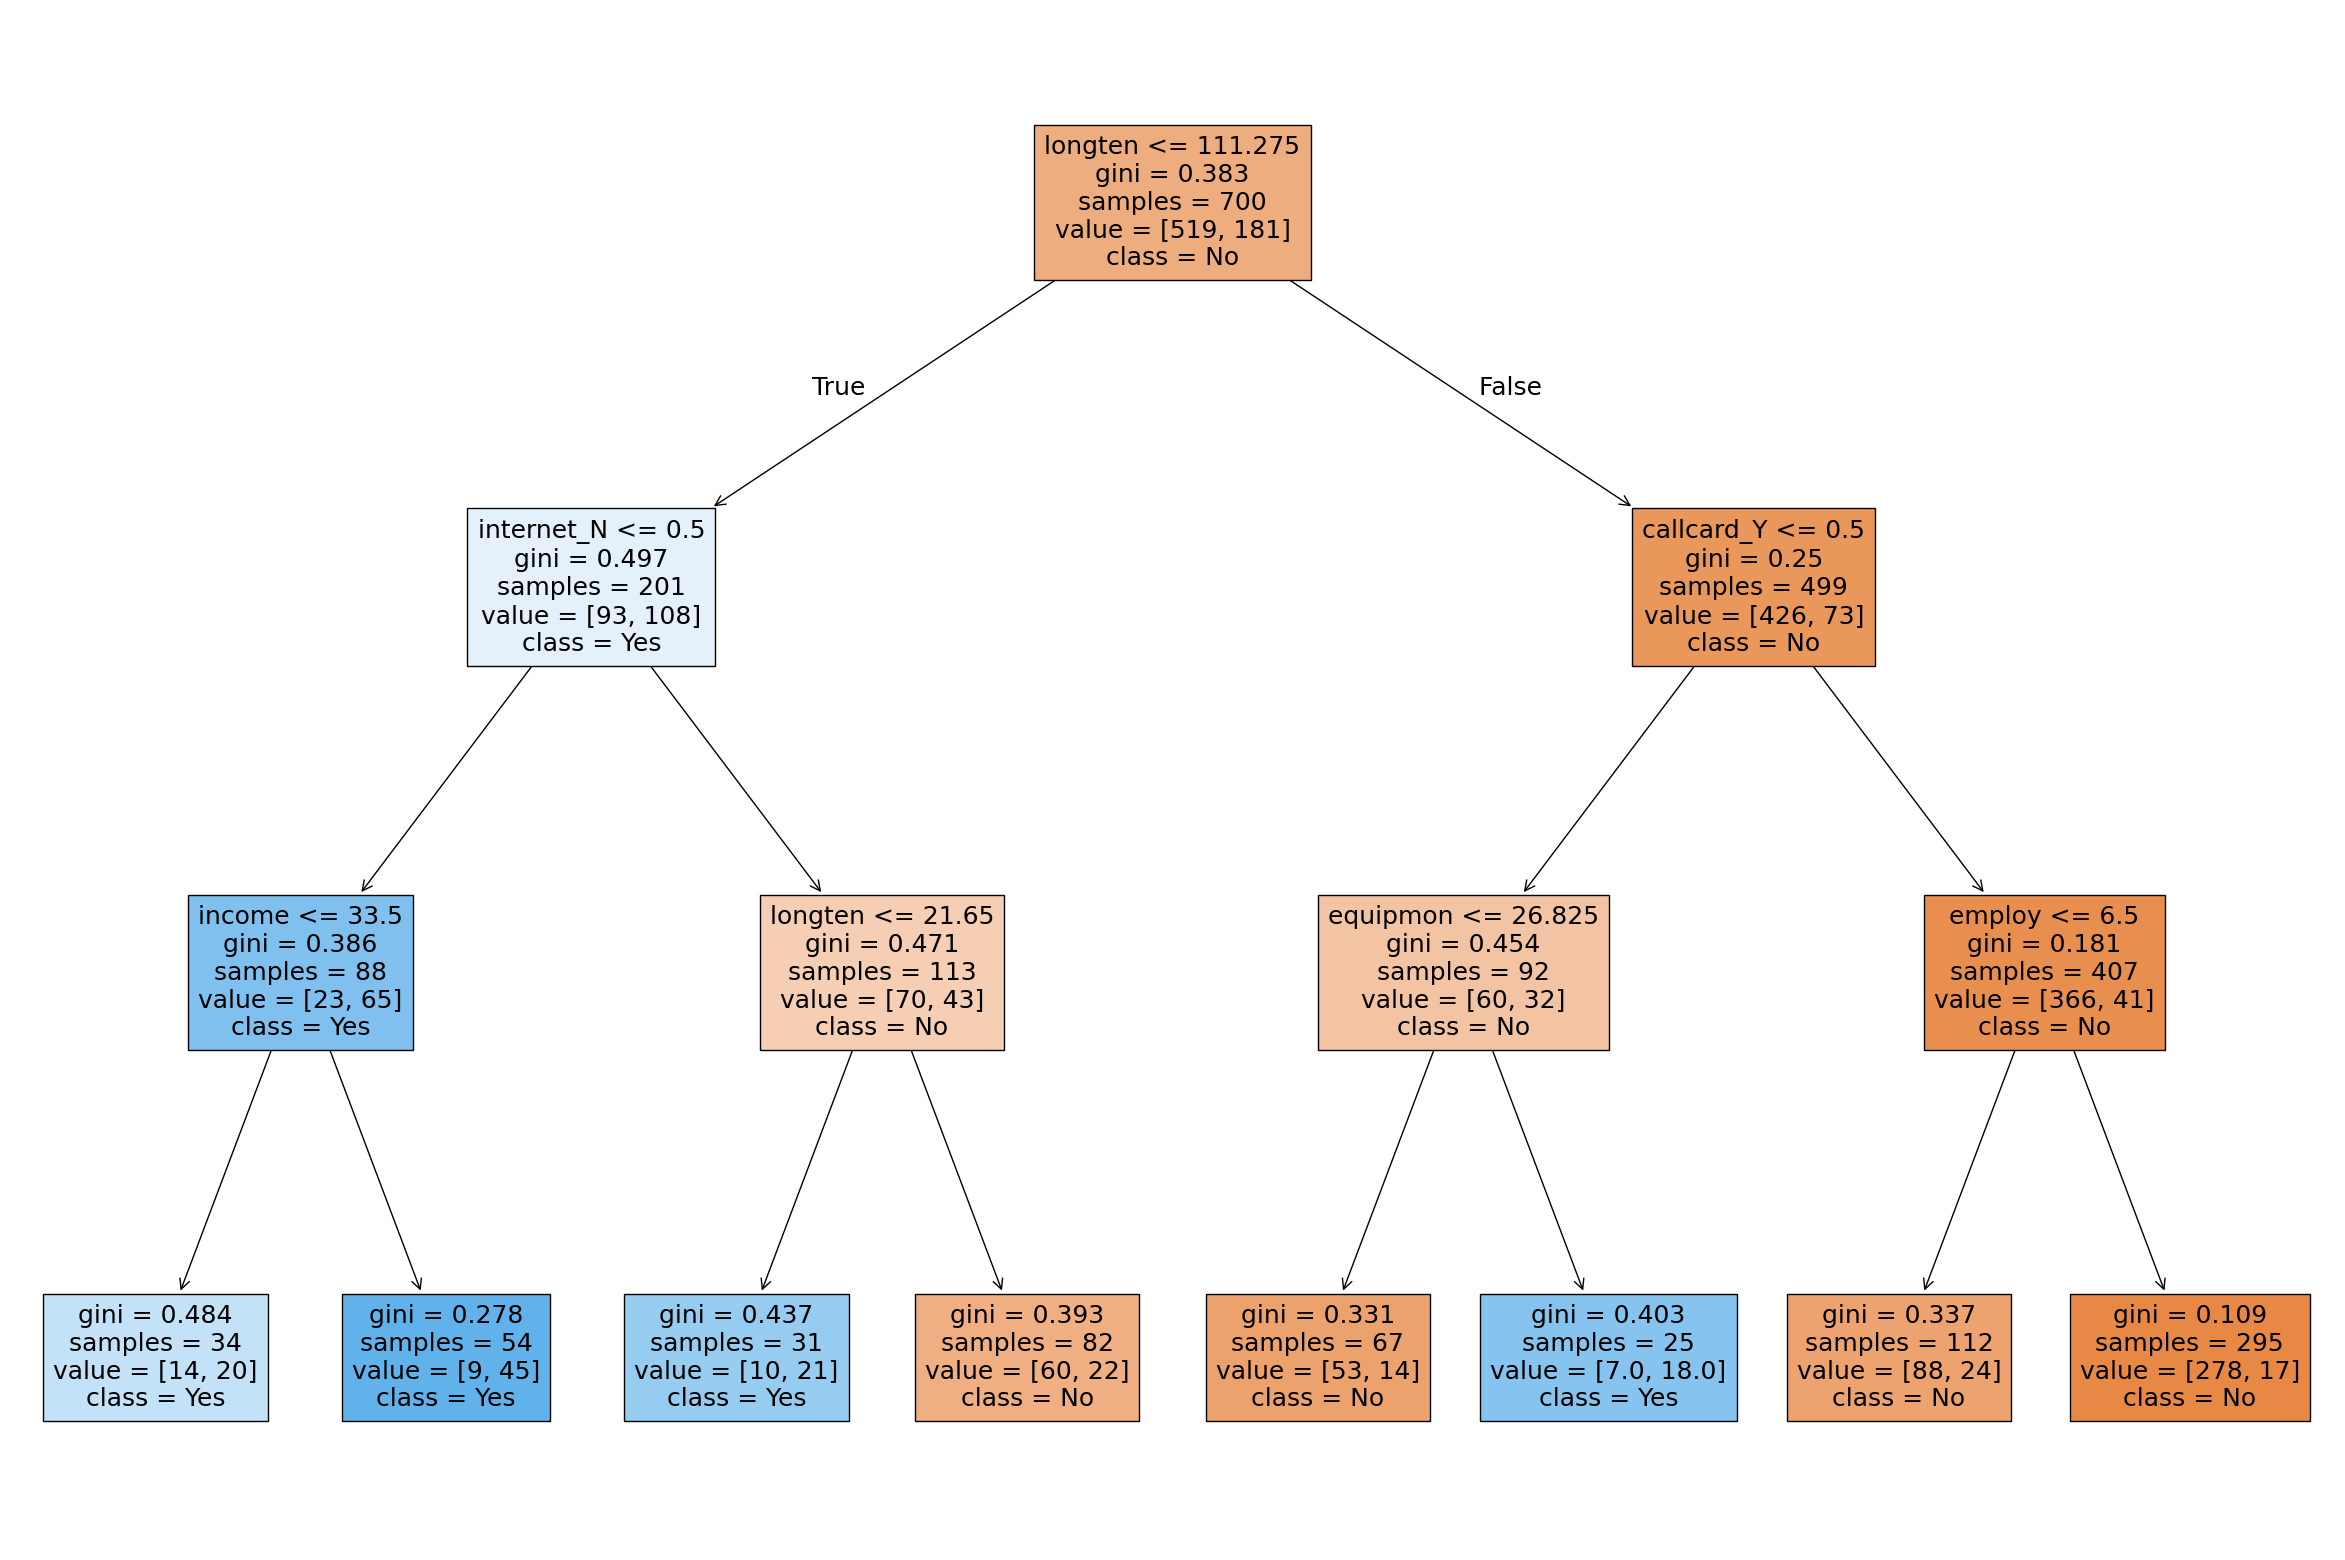

In [133]:
# Plot the decision tree (Gini)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_DT_gini,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [134]:
# Text version of decision tree (Gini)
print(tree.export_text(model_DT_gini, feature_names=list(predictors_train.columns)))

|--- longten <= 111.28
|   |--- internet_N <= 0.50
|   |   |--- income <= 33.50
|   |   |   |--- class: Y
|   |   |--- income >  33.50
|   |   |   |--- class: Y
|   |--- internet_N >  0.50
|   |   |--- longten <= 21.65
|   |   |   |--- class: Y
|   |   |--- longten >  21.65
|   |   |   |--- class: N
|--- longten >  111.28
|   |--- callcard_Y <= 0.50
|   |   |--- equipmon <= 26.82
|   |   |   |--- class: N
|   |   |--- equipmon >  26.82
|   |   |   |--- class: Y
|   |--- callcard_Y >  0.50
|   |   |--- employ <= 6.50
|   |   |   |--- class: N
|   |   |--- employ >  6.50
|   |   |   |--- class: N



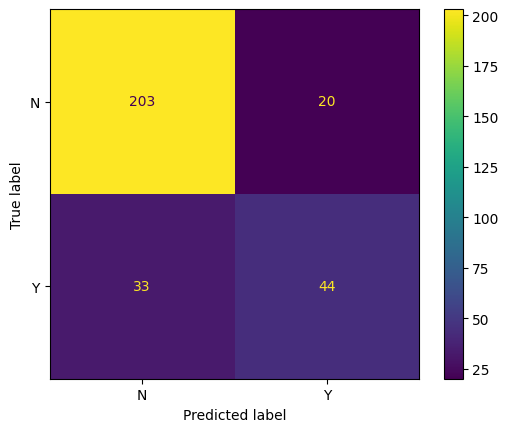

In [135]:
# Make predictions on testing data (Gini)
prediction_on_test_DT_gini = model_DT_gini.predict(predictors_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_DT_gini = confusion_matrix(target_test, prediction_on_test_DT_gini)
ConfusionMatrixDisplay(confusion_matrix=cm_DT_gini, display_labels=model_DT_gini.classes_).plot()


In [136]:
# Evaluation
print("Classification Report (Gini, max_depth=3):\n")
print(classification_report(target_test, prediction_on_test_DT_gini))

Classification Report (Gini, max_depth=3):

              precision    recall  f1-score   support

           N       0.86      0.91      0.88       223
           Y       0.69      0.57      0.62        77

    accuracy                           0.82       300
   macro avg       0.77      0.74      0.75       300
weighted avg       0.82      0.82      0.82       300



Model 2 Summary
* Gini, max_depth = 3
* Accuracy: 82%
* Precision (Churn): 0.69
* Recall (Churn): 0.57
* F1-score (Churn): 0.62

Compared to Model 1, the model improves churn recall with similar overall accuracy, but it still misses about 43% of actual churners (1 − 0.57 = 0.43; with 77 churners → TP ≈ 0.57×77 ≈ 44, FN = 77 − 44 = 33; 33/77 ≈ 43%) and about 31% of churn flags are false alarms (1 − 0.69 = 0.31; FP ≈ (1/0.69 − 1)×44 ≈ 20; predicted churns ≈ 44 + 20 = 64; 20/64 ≈ 31%).


### Model 3, Entropy = 5

In [137]:
model_DT_entropy5 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=5)
model_DT_entropy5.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.5037878787878788, 0.9166666666666666, 'longten <= 151.975\nentropy = 0.825\nsamples = 700\nvalue = [519, 181]\nclass = No'),
 Text(0.17424242424242425, 0.75, 'internet_N <= 0.5\nentropy = 1.0\nsamples = 233\nvalue = [115, 118]\nclass = Yes'),
 Text(0.3390151515151515, 0.8333333333333333, 'True  '),
 Text(0.06060606060606061, 0.5833333333333334, 'tenure <= 3.5\nentropy = 0.89\nsamples = 104\nvalue = [32, 72]\nclass = Yes'),
 Text(0.030303030303030304, 0.4166666666666667, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Yes'),
 Text(0.09090909090909091, 0.4166666666666667, 'cardmon <= 23.0\nentropy = 0.942\nsamples = 89\nvalue = [32, 57]\nclass = Yes'),
 Text(0.06060606060606061, 0.25, 'region_R2 <= 0.5\nentropy = 0.974\nsamples = 79\nvalue = [32.0, 47.0]\nclass = Yes'),
 Text(0.030303030303030304, 0.08333333333333333, 'entropy = 0.997\nsamples = 49\nvalue = [26, 23]\nclass = No'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.722\nsamples = 30\nvalue = [6, 2

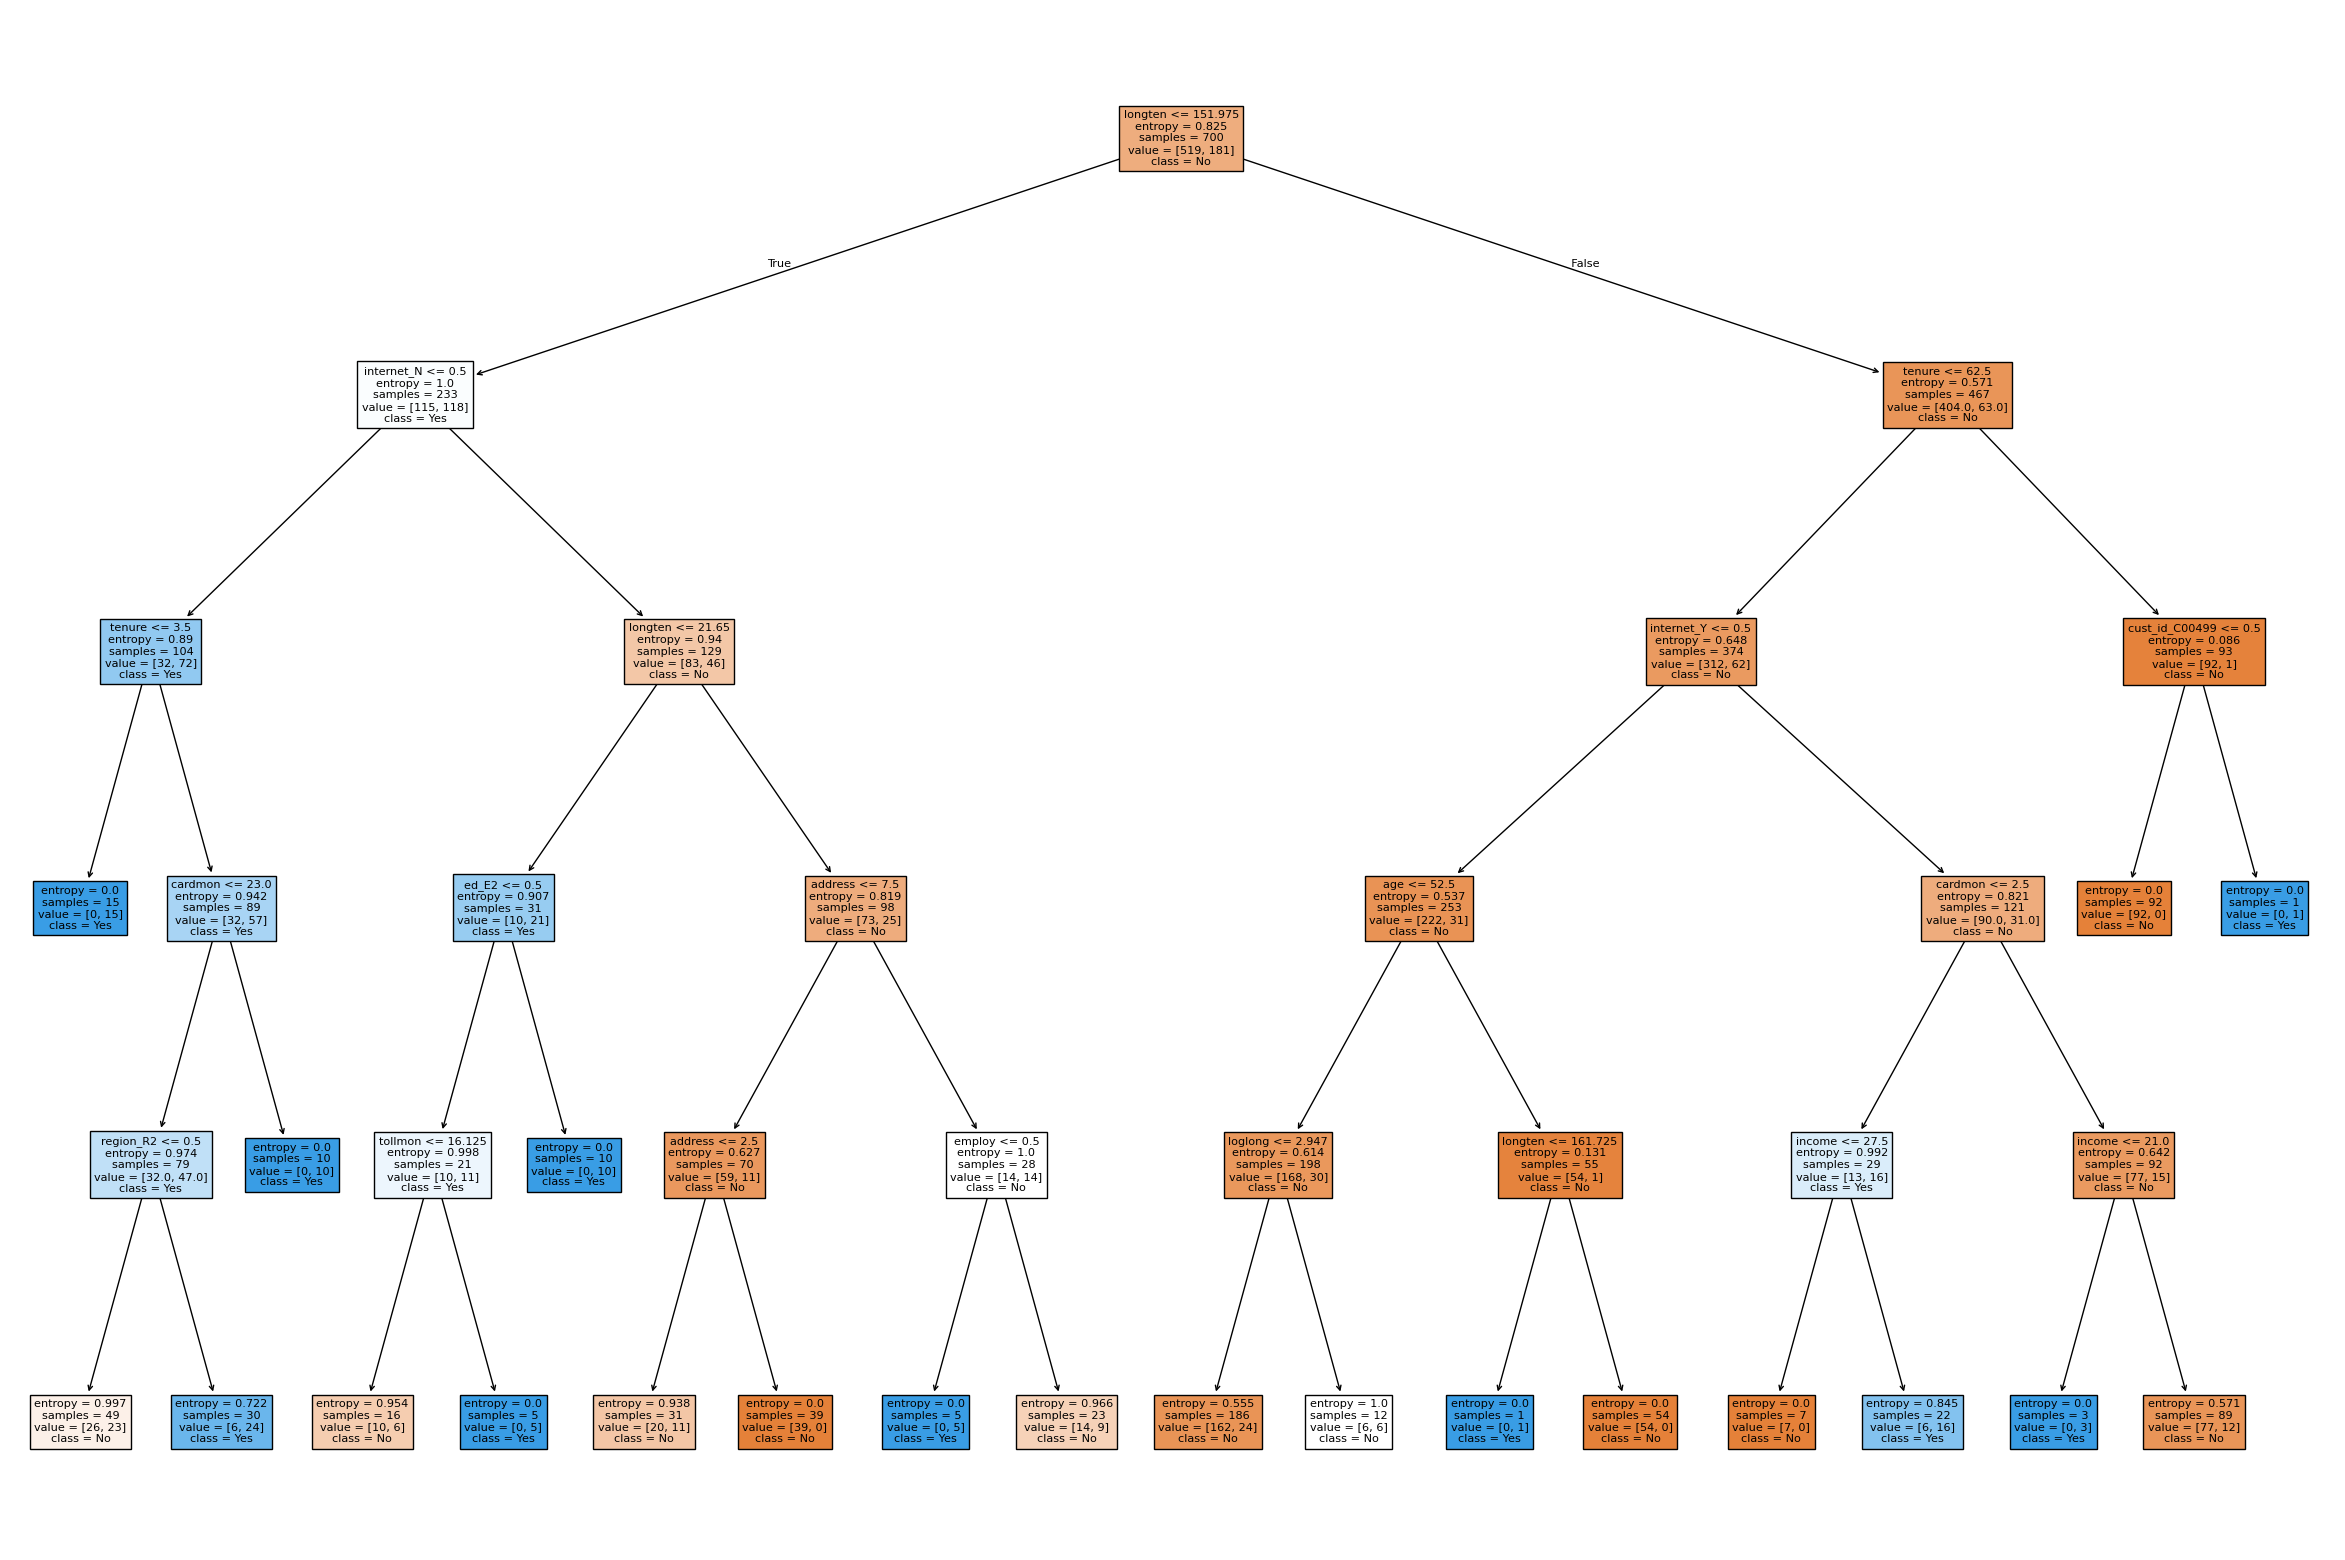

In [138]:
#Plot tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(
    model_DT_entropy5,
    feature_names=list(predictors_train.columns),
    class_names=['No','Yes'],
    filled=True
)


In [139]:
# Text version of decision tree
print(tree.export_text(model_DT_entropy5, feature_names=list(predictors_train.columns)))

|--- longten <= 151.97
|   |--- internet_N <= 0.50
|   |   |--- tenure <= 3.50
|   |   |   |--- class: Y
|   |   |--- tenure >  3.50
|   |   |   |--- cardmon <= 23.00
|   |   |   |   |--- region_R2 <= 0.50
|   |   |   |   |   |--- class: N
|   |   |   |   |--- region_R2 >  0.50
|   |   |   |   |   |--- class: Y
|   |   |   |--- cardmon >  23.00
|   |   |   |   |--- class: Y
|   |--- internet_N >  0.50
|   |   |--- longten <= 21.65
|   |   |   |--- ed_E2 <= 0.50
|   |   |   |   |--- tollmon <= 16.12
|   |   |   |   |   |--- class: N
|   |   |   |   |--- tollmon >  16.12
|   |   |   |   |   |--- class: Y
|   |   |   |--- ed_E2 >  0.50
|   |   |   |   |--- class: Y
|   |   |--- longten >  21.65
|   |   |   |--- address <= 7.50
|   |   |   |   |--- address <= 2.50
|   |   |   |   |   |--- class: N
|   |   |   |   |--- address >  2.50
|   |   |   |   |   |--- class: N
|   |   |   |--- address >  7.50
|   |   |   |   |--- employ <= 0.50
|   |   |   |   |   |--- class: Y
|   |   |   |   |--- 

In [140]:
# Make predictions on testing data
prediction_on_test_DT_entropy5 = model_DT_entropy5.predict(predictors_test)

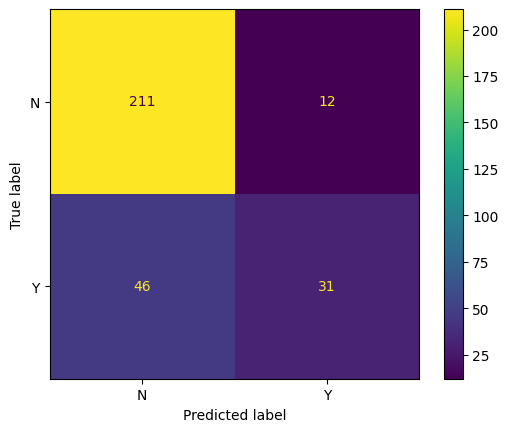

In [141]:
# Confusion Matrix
cm_DT_entropy5 = confusion_matrix(target_test, prediction_on_test_DT_entropy5)
ConfusionMatrixDisplay(confusion_matrix=cm_DT_entropy5, display_labels=model_DT_entropy5.classes_).plot()

In [142]:
print("Classification Report (Entropy, max_depth=5):\n")
print(classification_report(target_test, prediction_on_test_DT_entropy5))

Classification Report (Entropy, max_depth=5):

              precision    recall  f1-score   support

           N       0.82      0.95      0.88       223
           Y       0.72      0.40      0.52        77

    accuracy                           0.81       300
   macro avg       0.77      0.67      0.70       300
weighted avg       0.80      0.81      0.79       300



Model 3 Summary
* Entropy, max_depth = 5
* Accuracy: 81%
* Precision (Churn): 0.72
* Recall (Churn): 0.40
* F1-score (Churn): 0.52

The model predicted most non-churners correctly but missed many actual churners (churn recall = 0.40; miss rate = 1−0.40 = 0.60 ≈ 60%; TP ≈ 0.40×77 ≈ 31; FN = 77−31 = 46) and some churn flags are false alarms (false-alarm rate = 1−0.72 = 0.28 ≈ 28%; FP ≈ (1/0.72 − 1)×31 ≈ 12; predicted churns ≈ 31+12 = 43; 12/43 ≈ 28%).


### Model 4, Gini = Full Depth

In [143]:
# Decision tree model on training data (Gini, full depth)
model_DT_gini_full = DecisionTreeClassifier(criterion="gini", random_state=1)
model_DT_gini_full.fit(predictors_train, target_train)

DecisionTreeClassifier(random_state=1)

[Text(0.5523767605633803, 0.975, 'longten <= 111.275\ngini = 0.383\nsamples = 700\nvalue = [519, 181]\nclass = No'),
 Text(0.2887323943661972, 0.925, 'internet_N <= 0.5\ngini = 0.497\nsamples = 201\nvalue = [93, 108]\nclass = Yes'),
 Text(0.42055457746478875, 0.95, 'True  '),
 Text(0.1619718309859155, 0.875, 'income <= 33.5\ngini = 0.386\nsamples = 88\nvalue = [23, 65]\nclass = Yes'),
 Text(0.09154929577464789, 0.825, 'longten <= 52.85\ngini = 0.484\nsamples = 34\nvalue = [14, 20]\nclass = Yes'),
 Text(0.056338028169014086, 0.775, 'reside <= 2.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Yes'),
 Text(0.028169014084507043, 0.725, 'income_group_<30k <= 0.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]\nclass = Yes'),
 Text(0.014084507042253521, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.04225352112676056, 0.675, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Yes'),
 Text(0.08450704225352113, 0.725, 'forward_N <= 0.5\ngini = 0.32\nsamples = 5\nval

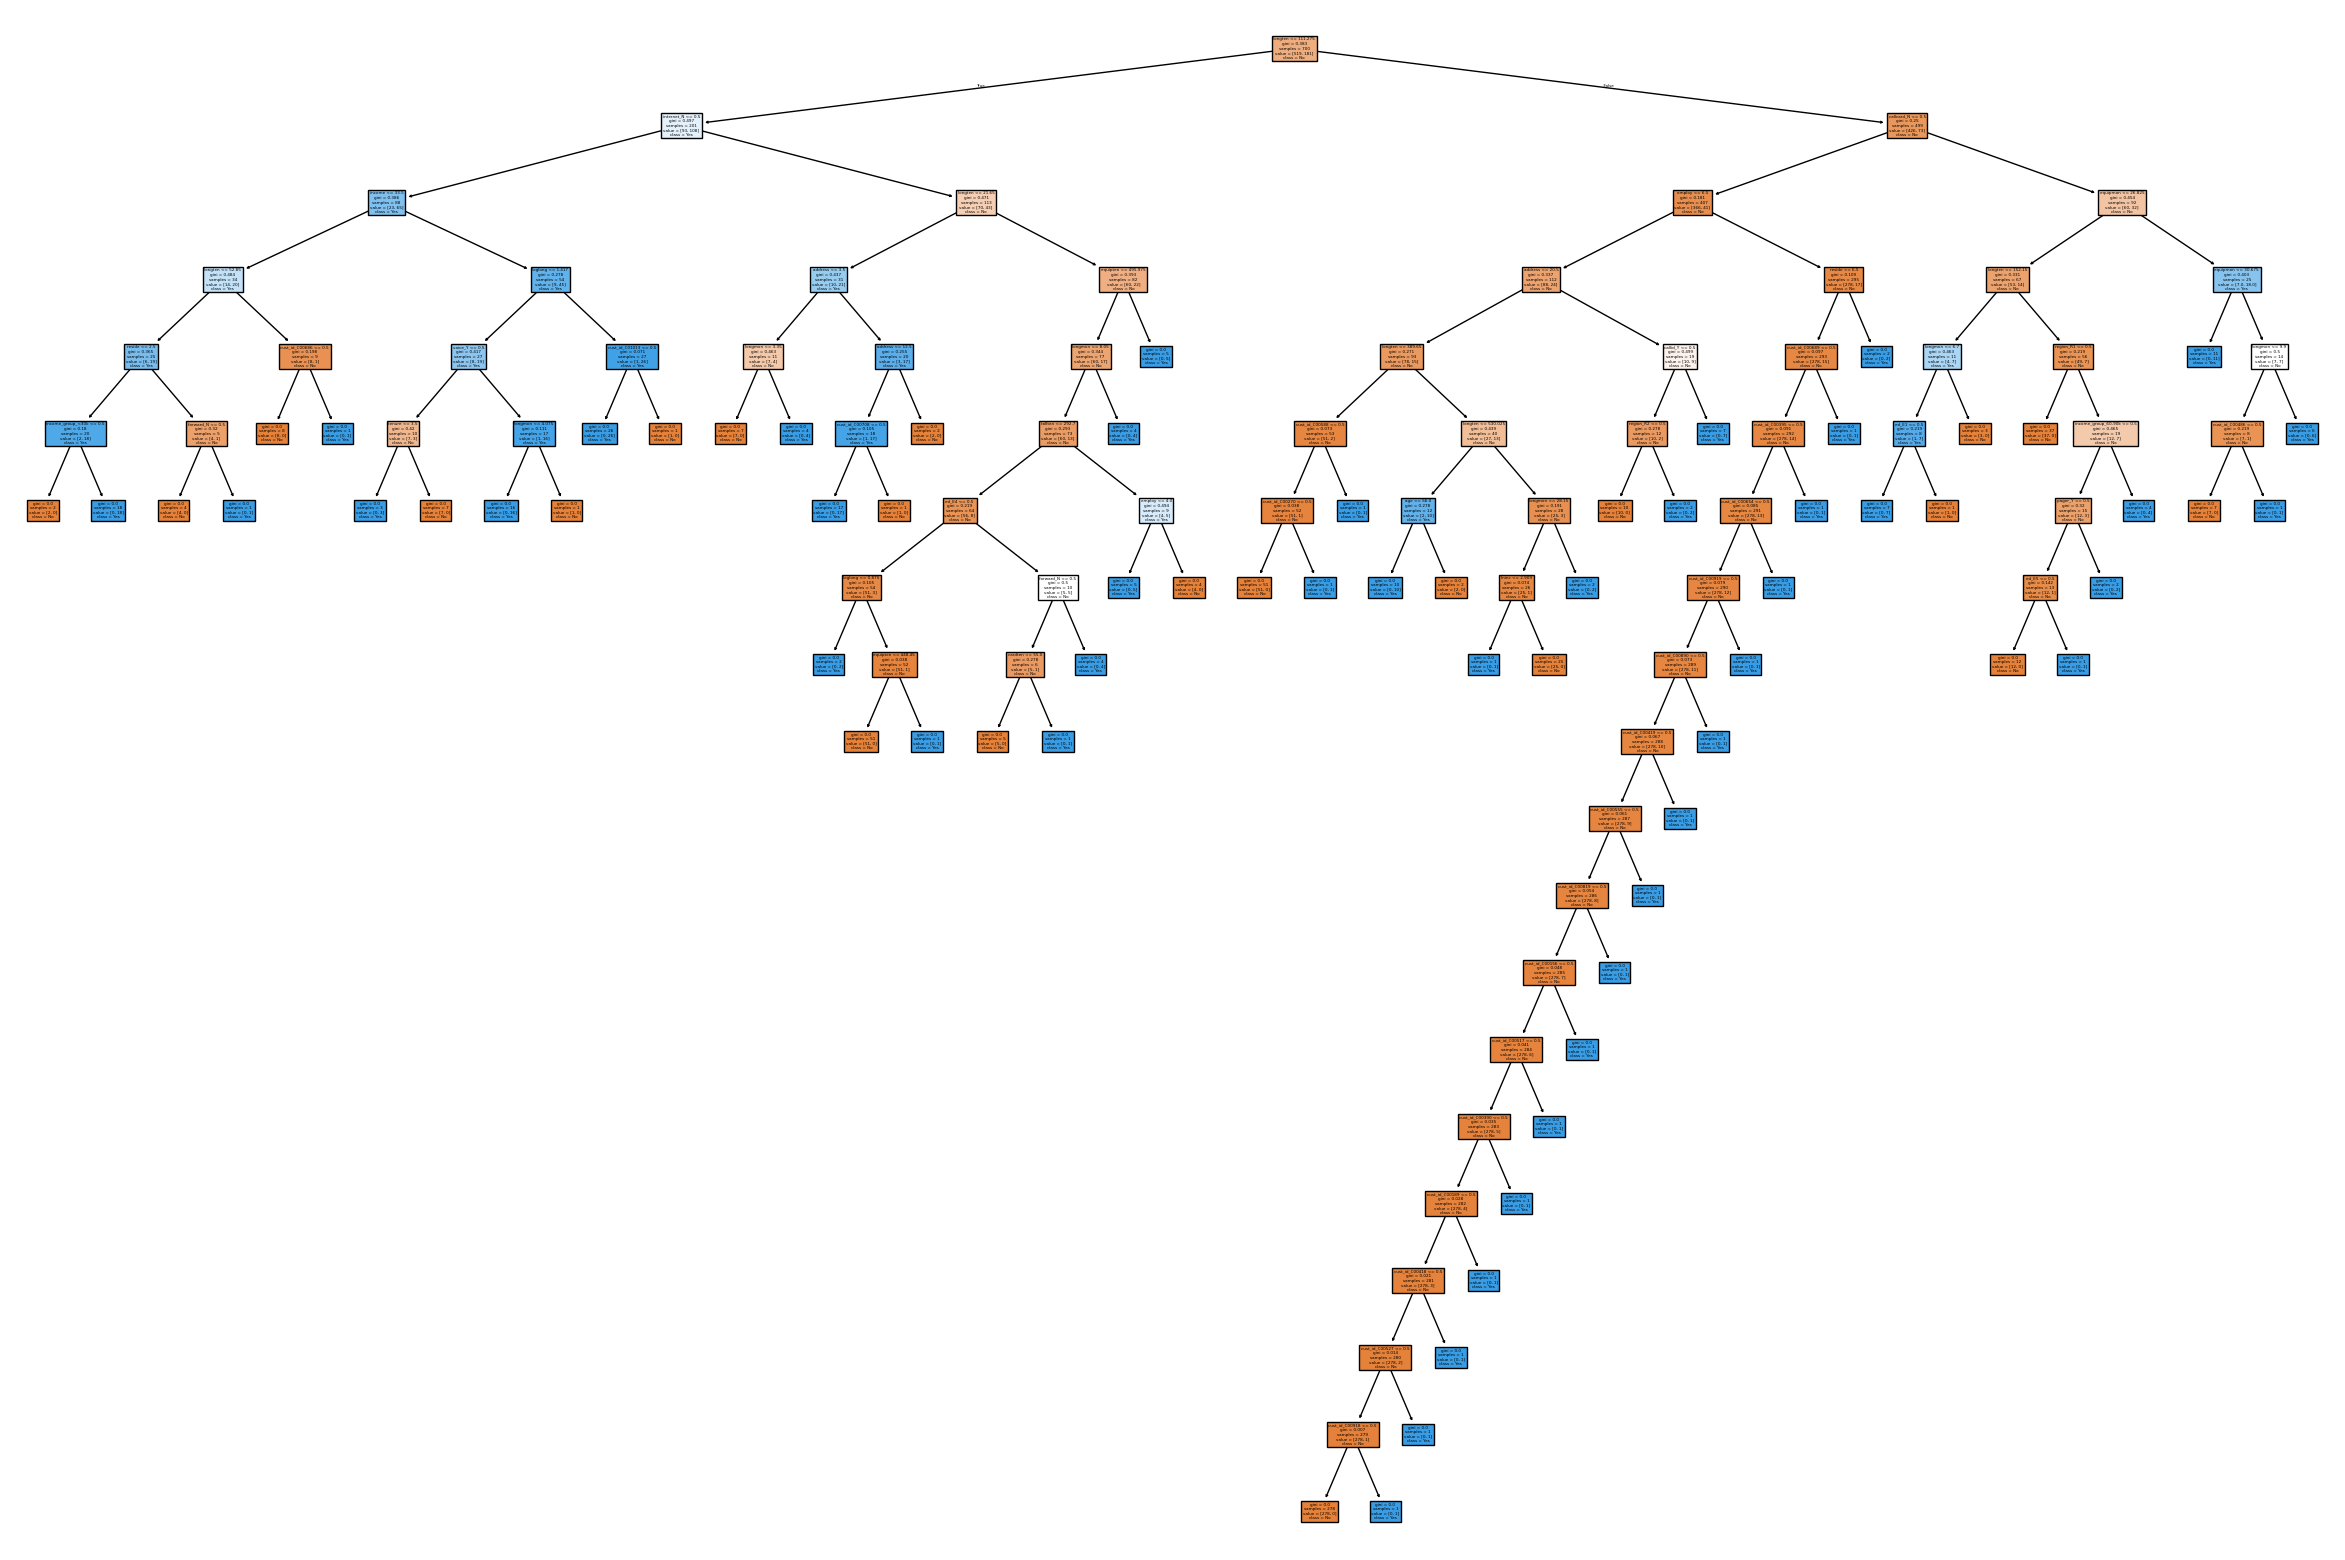

In [144]:
# Plot the decision tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(
    model_DT_gini_full,
    feature_names=list(predictors_train.columns),
    class_names=['No','Yes'],
    filled=True
)

In [145]:
# Text version of decision tree (Gini, full depth)
print(tree.export_text(model_DT_gini_full, feature_names=list(predictors_train.columns)))

|--- longten <= 111.28
|   |--- internet_N <= 0.50
|   |   |--- income <= 33.50
|   |   |   |--- longten <= 52.85
|   |   |   |   |--- reside <= 2.50
|   |   |   |   |   |--- income_group_<30k <= 0.50
|   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- income_group_<30k >  0.50
|   |   |   |   |   |   |--- class: Y
|   |   |   |   |--- reside >  2.50
|   |   |   |   |   |--- forward_N <= 0.50
|   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- forward_N >  0.50
|   |   |   |   |   |   |--- class: Y
|   |   |   |--- longten >  52.85
|   |   |   |   |--- cust_id_C00686 <= 0.50
|   |   |   |   |   |--- class: N
|   |   |   |   |--- cust_id_C00686 >  0.50
|   |   |   |   |   |--- class: Y
|   |   |--- income >  33.50
|   |   |   |--- loglong <= 1.42
|   |   |   |   |--- voice_Y <= 0.50
|   |   |   |   |   |--- tenure <= 3.50
|   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |--- tenure >  3.50
|   |   |   |   |   |   |--- class: N
|   |   |   |   |--- voice_Y 

In [146]:
# Make predictions on testing data (Gini, full depth)
prediction_on_test_DT_gini_full = model_DT_gini_full.predict(predictors_test)

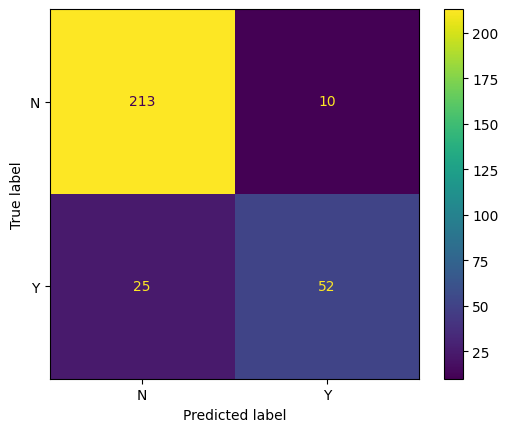

In [147]:
# Confusion Matrix (Gini, full depth)
cm_DT_gini_full = confusion_matrix(target_test, prediction_on_test_DT_gini_full)
ConfusionMatrixDisplay(confusion_matrix=cm_DT_gini_full, display_labels=model_DT_gini_full.classes_).plot()

In [148]:
# Classification report (Gini, full depth)
from sklearn.metrics import classification_report
print("Classification Report (Gini, full depth):\n")
print(classification_report(target_test, prediction_on_test_DT_gini_full))

Classification Report (Gini, full depth):

              precision    recall  f1-score   support

           N       0.89      0.96      0.92       223
           Y       0.84      0.68      0.75        77

    accuracy                           0.88       300
   macro avg       0.87      0.82      0.84       300
weighted avg       0.88      0.88      0.88       300



Model 4 Summarry
* Gini, full depth
* Accuracy: 88%
* Precision (Churn): 0.84
* Recall (Churn): 0.68
* F1-score (Churn): 0.75

Compared to earlier models, this one captures many more churners with higher overall accuracy; downside: it still misses about 32% of actual churners (churn recall = 0.68; miss rate = 1−0.68 = 0.32 ≈ 32%; TP ≈ 0.68×77 ≈ 52; FN = 77−52 = 25) and ~16% of churn flags are false alarms (false-alarm rate = 1−0.84 = 0.16 ≈ 16%; FP ≈ (1/0.84 − 1)×52 ≈ 10; predicted churns ≈ 52+10 = 62; 10/62 ≈ 16%).

## 5. Evaluation



### Model-by-Model Summary

#### Model 1, Entropy = 3
* Entropy, max_depth = 3
* Accuracy: 81%
* Precision (Churn): 0.68
* Recall (Churn): 0.51
* F1-score (Churn): 0.58

The model predicted most non-churners correctly but missed a significant number of actual churners (churn recall = 0.51; miss rate = 1−0.51 = 0.49 ≈ 49%; TP ≈ 0.51×77 ≈ 39; FN = 77−39 = 38).

---
#### Model 2, Gini = 3
* Gini, max_depth = 3
* Accuracy: 82%
* Precision (Churn): 0.69
* Recall (Churn): 0.57
* F1-score (Churn): 0.62

Compared to Model 1, this model improves churn recall with similar overall accuracy, but it still misses many churners (miss rate = 1−0.57 = 0.43 ≈ 43%; TP ≈ 0.57×77 ≈ 44; FN = 77−44 = 33) and some churn flags are false alarms (false-alarm rate = 1−0.69 = 0.31 ≈ 31%; FP ≈ (1/0.69 − 1)×44 ≈ 19; predicted churns ≈ 44+19 = 63; 19/63 ≈ 30–31%).

---
#### Model 3, Entropy = 5
* Entropy, max_depth = 5
* Accuracy: 81%
* Precision (Churn): 0.72
* Recall (Churn): 0.40
* F1-score (Churn): 0.52

The model predicted most non-churners correctly but missed many actual churners (churn recall = 0.40; miss rate = 1−0.40 = 0.60 ≈ 60%; TP ≈ 0.40×77 ≈ 31

---
#### Model 4, Gini = Full Depth
* Gini, full depth
* Accuracy: 88%
* Precision (Churn): 0.84
* Recall (Churn): 0.68
* F1-score (Churn): 0.75

This model captures many more churners with higher overall accuracy; downside: it still misses some churners and generates a few false alarms (miss rate = 1−0.68 = 0.32 ≈ 32%; TP ≈ 0.68×77 ≈ 52; FN = 77−52 = 25; false-alarm rate = 1−0.84 = 0.16 ≈ 16%; FP ≈ (1/0.84 − 1)×52 ≈ 10; predicted churns ≈ 52+10 = 62; 10/62 ≈ 16%).


### How the top model addresses churn (Gini, full depth)

• Prioritize at-risk customers:
  Use the model’s predicted class/probability to rank customers and trigger retention actions (save-desk routing, targeted offers, outreach). On the test set it finds many churners (recall ≈ 0.68 → TP ≈ 0.68×77 ≈ 52; FN = 77−52 = 25) while keeping false alarms relatively low (precision ≈ 0.84 → FP ≈ (1/0.84−1)×52 ≈ 10).

• Tiered interventions by risk:
  Bucket scores into High/Medium/Low (e.g., High ≥ 0.70, Medium 0.50–0.70, Low < 0.50). Offer higher-value incentives to High, lighter touches to Medium, and monitor Low to align cost with expected uplift.

• Threshold tuning to business costs:
  If missing churners is expensive, lower the decision threshold to increase recall (miss rate = 1−recall = 1−0.68 = 0.32 ≈ 32%). If outreach cost is the concern, raise the threshold to increase precision (false-alarm rate = 1−0.84 = 0.16 ≈ 16%). Choose the threshold that maximizes expected ROI given offer cost and LTV.

• Operational integration:
  Feed daily/weekly scores to CRM/CS tools to auto-create save cases, personalize scripts, and measure outcomes (saves, revenue retained). Track precision/recall over time and by segment to detect drift.

Is it practical for businesses?

• Yes—immediately actionable:
  Accuracy ≈ 88% and churn-class F1 ≈ 0.75 support efficient targeting (most flagged customers are truly at risk). The single-tree structure is interpretable for ops/legal/execs.

• Guardrails:
  (1) Reduce overfitting risk via pruning (tune ccp_alpha) or constraints (min_samples_leaf) with cross-validation.
  (2) Calibrate probabilities (Platt/Isotonic) and set thresholds by cost–benefit (missed-churn cost vs outreach cost).
  (3) Monitor drift and retrain on a schedule (e.g., monthly/quarterly); A/B test against a control to confirm net revenue lift.

### Bottom line:
Use the model as a retention prioritization engine—score customers, tier by risk, take tailored actions, and tune thresholds/pruning to hit ROI targets while keeping missed churners and false alarms within acceptable bounds (miss ≈ 32%, false-alarm ≈ 16% at current settings).


In [149]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Predicting Customer Churn Python Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Predicting Customer Churn Python Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 2781541 bytes to /content/drive/MyDrive/Colab Notebooks/Predicting Customer Churn Python Project.html
